In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-census-demographic-data/acs2017_census_tract_data.csv
/kaggle/input/us-census-demographic-data/acs2017_county_data.csv
/kaggle/input/us-census-demographic-data/acs2015_census_tract_data.csv
/kaggle/input/us-census-demographic-data/acs2015_county_data.csv
/kaggle/input/united-states-crime-rates-by-county/crime_data_w_population_and_crime_rate.csv


# Intro

# Imports

In [2]:
# we must pip install kaleido, 
# this must be at the top of the imports
!pip install kaleido
import kaleido #required
kaleido.__version__ #0.2.1

import plotly
plotly.__version__ #5.5.0

import plotly.express as px

import pandas as pd

import json

from IPython.display import Image

from urllib.request import urlopen

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('expand_frame_repr', False)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 16.7 MB/s eta 0:00:00


# Loading the data and very quick EDA

In [3]:
# first load the census data, and drop Puerto Rico as we are intrested in just the 50 states (plus Washington DC)
censusDf = pd.read_csv("/kaggle/input/us-census-demographic-data/acs2017_county_data.csv")
censusDf = censusDf.drop(censusDf[censusDf["State"] == "Puerto Rico"].index)

# also load the crime data
crimeDf = pd.read_csv("/kaggle/input/united-states-crime-rates-by-county/crime_data_w_population_and_crime_rate.csv")

print(censusDf.shape, crimeDf.shape)

(3142, 37) (3136, 24)


In [4]:
censusDf.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,0.0,155376,52562,1348,29364,735,11.8,16.1,35.7,18.2,25.6,9.7,10.8,84.7,7.6,0.1,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,0.6,0.0,20269,33368,2551,17561,798,27.2,44.9,25.0,16.8,22.6,11.5,24.1,83.4,11.1,0.3,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,0.0,0.0,17662,43404,3431,20911,1889,15.2,26.6,24.4,17.6,19.7,15.9,22.4,86.4,9.5,0.7,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,0.1,0.0,42513,47412,2630,22021,850,15.6,25.4,28.5,12.9,23.3,15.8,19.5,86.8,10.2,0.1,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [5]:
crimeDf.head()

,county_name,crime_rate_per_100000,index,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,AG_ARRST,AG_OFF,COVIND,INDEX,MODINDX,MURDER,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY
0,"St. Louis city, MO",1791.995377,1,1,4,1612,318667,318667,15,15,100.0,5706,22329,119,200,1778,3609,4995,13791,3543,464,318416,29,510
1,"Crittenden County, AR",1754.914968,2,1,4,130,50717,50717,4,4,100.0,873,3424,8,38,165,662,1482,1753,189,28,49746,5,35
2,"Alexander County, IL",1664.700485,3,1,4,604,8040,8040,2,2,100.0,127,278,1,2,5,119,82,184,12,2,7629,17,3
3,"Kenedy County, TX",1456.310680,4,1,4,2681,444,444,1,1,100.0,6,13,0,3,1,2,5,4,4,0,412,48,261
4,"De Soto Parish, LA",1447.402430,5,1,4,1137,26971,26971,3,3,100.0,392,703,3,4,17,368,149,494,60,0,27083,22,31


In [6]:
censusDf["State"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [7]:
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
    
print(len(counties))

2


# Prepare the data

In [8]:
def convertToFipsForCensus(row):
    countyId = row["CountyId"]

    if countyId >= 10000:
        return str(countyId)

    return "0" + str(countyId)

censusDf["fips"] = censusDf.apply(lambda row: convertToFipsForCensus(row), axis = 1)
censusDf.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,fips
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2,01001
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,0.0,155376,52562,1348,29364,735,11.8,16.1,35.7,18.2,25.6,9.7,10.8,84.7,7.6,0.1,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5,01003
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,0.6,0.0,20269,33368,2551,17561,798,27.2,44.9,25.0,16.8,22.6,11.5,24.1,83.4,11.1,0.3,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4,01005
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,0.0,0.0,17662,43404,3431,20911,1889,15.2,26.6,24.4,17.6,19.7,15.9,22.4,86.4,9.5,0.7,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2,01007
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,0.1,0.0,42513,47412,2630,22021,850,15.6,25.4,28.5,12.9,23.3,15.8,19.5,86.8,10.2,0.1,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9,01009


In [9]:
def createFipsForCrime(row):
    cityFips = str(row["FIPS_CTY"])
    stateFips = str(row["FIPS_ST"])

    if len(cityFips) == 1:
        cityFips = "00" + cityFips

    if len(cityFips) == 2:
        cityFips = "0" + cityFips

    if len(stateFips) == 1:
        stateFips = "0" + stateFips

    return stateFips + cityFips

crimeDf["fips"] = crimeDf.apply(lambda row: createFipsForCrime(row), axis = 1)
crimeDf.head()

,county_name,crime_rate_per_100000,index,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,AG_ARRST,AG_OFF,COVIND,INDEX,MODINDX,MURDER,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY,fips
0,"St. Louis city, MO",1791.995377,1,1,4,1612,318667,318667,15,15,100.0,5706,22329,119,200,1778,3609,4995,13791,3543,464,318416,29,510,29510
1,"Crittenden County, AR",1754.914968,2,1,4,130,50717,50717,4,4,100.0,873,3424,8,38,165,662,1482,1753,189,28,49746,5,35,05035
2,"Alexander County, IL",1664.700485,3,1,4,604,8040,8040,2,2,100.0,127,278,1,2,5,119,82,184,12,2,7629,17,3,17003
3,"Kenedy County, TX",1456.310680,4,1,4,2681,444,444,1,1,100.0,6,13,0,3,1,2,5,4,4,0,412,48,261,48261
4,"De Soto Parish, LA",1447.402430,5,1,4,1137,26971,26971,3,3,100.0,392,703,3,4,17,368,149,494,60,0,27083,22,31,22031


In [10]:
censusDf = censusDf.merge(crimeDf, how="left", on="fips")

# Declare the method we will use for plotting

In [11]:
def showMap(df: pd.DataFrame, counties, target: str, colorscheme="turbo", min=5, max=50):

    fig = px.choropleth(df, geojson=counties, locations='fips', color=target,
                        color_continuous_scale=colorscheme,
                        range_color=(min, max),
                        scope="usa",
                        labels={target: f'{target}'}
                        )
    fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})

    return Image(fig.to_image(format="png", width=600, height=350, scale=2))

def plotTopAndBottom(df: pd.DataFrame, target: str, targetDisplayName: str = None):
    df = df.sort_values(target)

    if targetDisplayName  == None:
        targetDisplayName = target

    localDf = df[["county_name", target]]
    localDf = localDf[localDf[target].notna()]
    minDf = localDf.head().sort_values(target, ascending=False)
    maxDf = localDf.tail().sort_values(target, ascending=False)

    ax = minDf.plot.barh(x='county_name', y=target, figsize=(16, 6), title=f"Counties with fewest {targetDisplayName}")
    ax.set_xlabel(targetDisplayName)
    ax.set_ylabel("")

    plt.show()
    plt.close()
    plt.clf()

    ax = maxDf.plot.barh(x='county_name', y=target, figsize=(16, 6), color="red", title=f"Counties with most {targetDisplayName}")
    ax.set_xlabel(targetDisplayName)
    ax.set_ylabel("")
    plt.show()

# Population
Let's start by investigating the population distribution among counties. We will first interogate the minimum population and maximum population, then plot the counties with least and most population. After this we will plot a very pretty map representing the county population on a map.

In [12]:
minTotalPopulation = censusDf["TotalPop"].min()
maxTotalPopulation = censusDf["TotalPop"].max()

print(f"min total population {minTotalPopulation} and max total population {maxTotalPopulation}")

min total population 74 and max total population 10105722


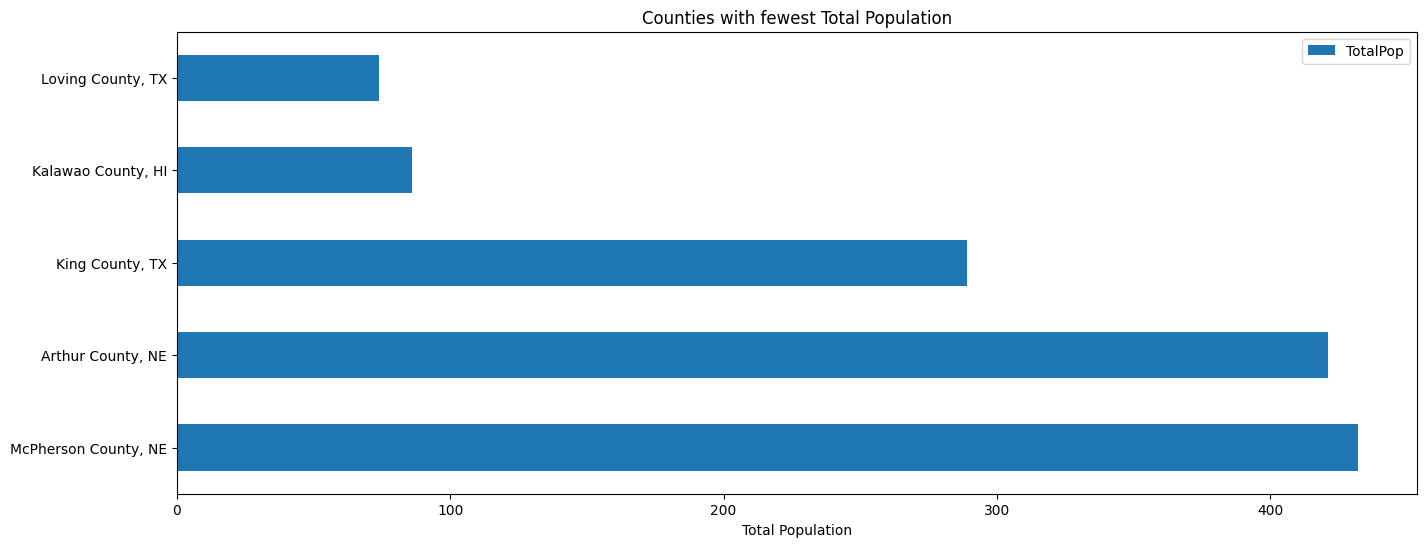

<Figure size 640x480 with 0 Axes>

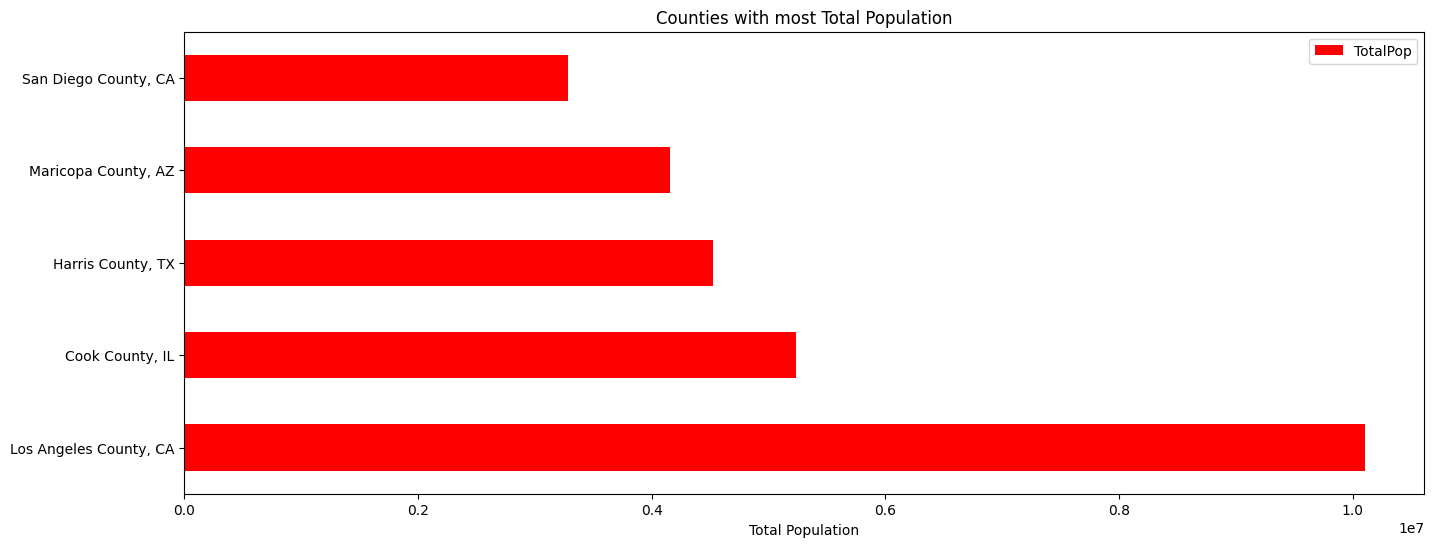

In [13]:
# plot the top 15 counties, and bottom 5 counties by Total Population
plotTopAndBottom(censusDf, "TotalPop", "Total Population")

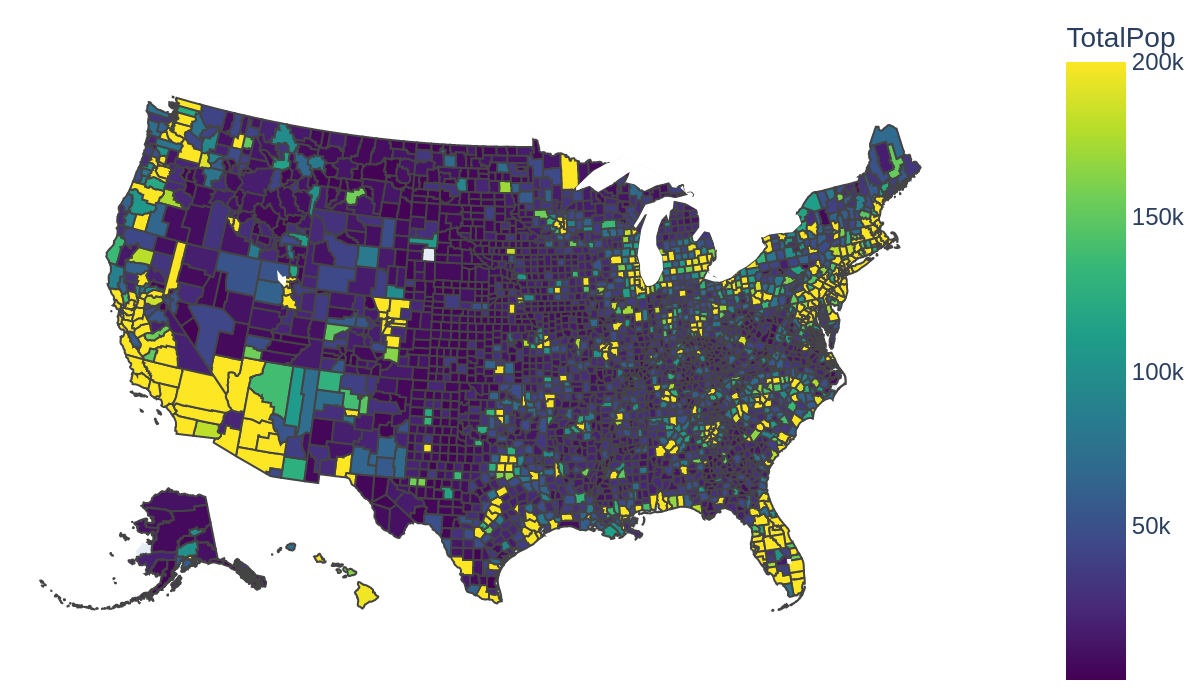

In [14]:
showMap(censusDf, counties, "TotalPop", min=200, max=200000, colorscheme="Viridis")

# Unemployment

In [15]:
minUnemployment = censusDf["Unemployment"].min()
maxUnemployment = censusDf["Unemployment"].max()

print(f"min unemployment {minUnemployment} and max unemployment {maxUnemployment}")

min unemployment 0.0 and max unemployment 28.8


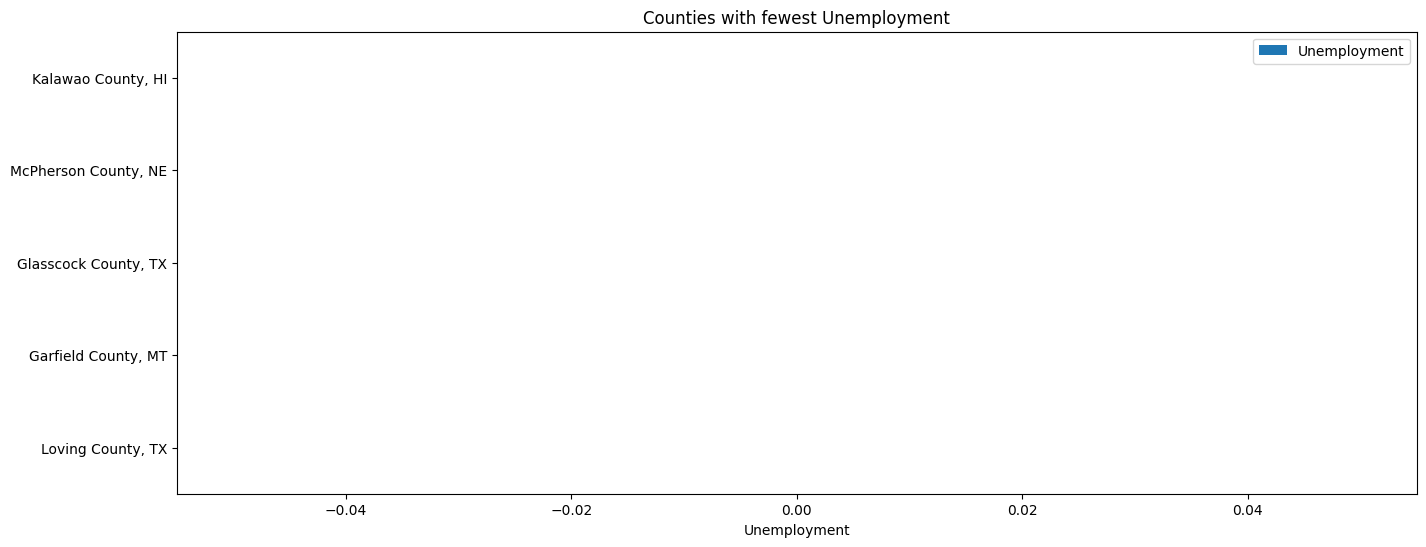

<Figure size 640x480 with 0 Axes>

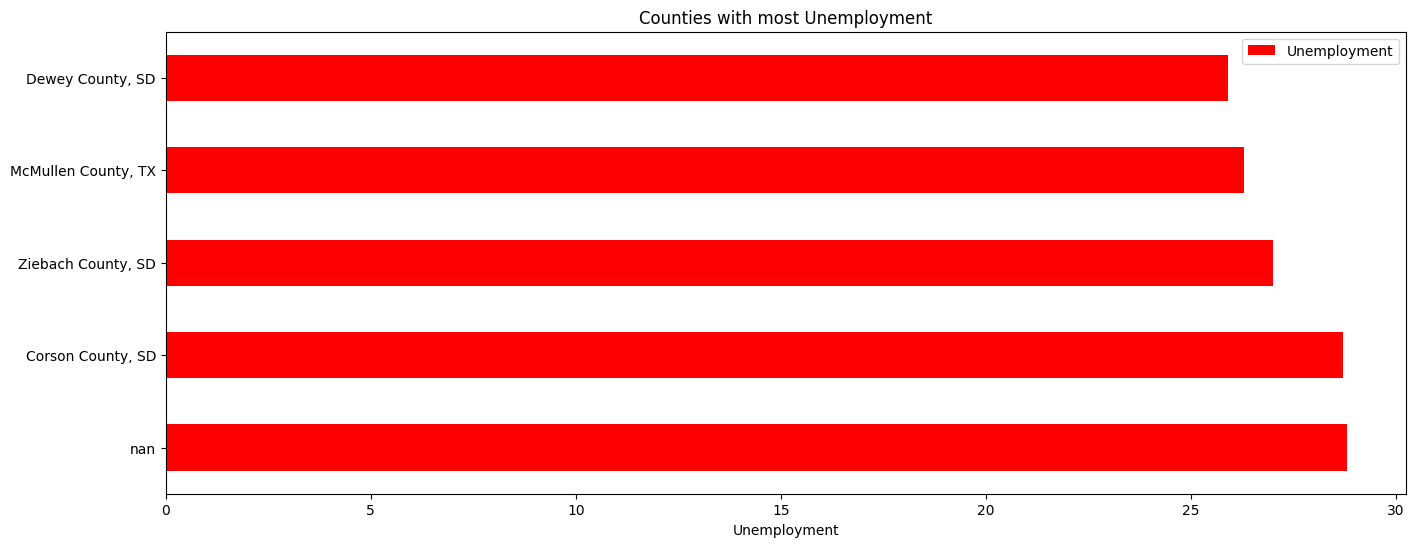

In [16]:
# plot the top 15 counties, and bottom 5 counties by Total Population
plotTopAndBottom(censusDf, "Unemployment")

# Poverty

In [17]:
minPoverty = censusDf["Poverty"].min()
maxPoverty = censusDf["Poverty"].max()

print(f"min poverty {minPoverty} and max poverty {maxPoverty}")

min poverty 2.4 and max poverty 52.0


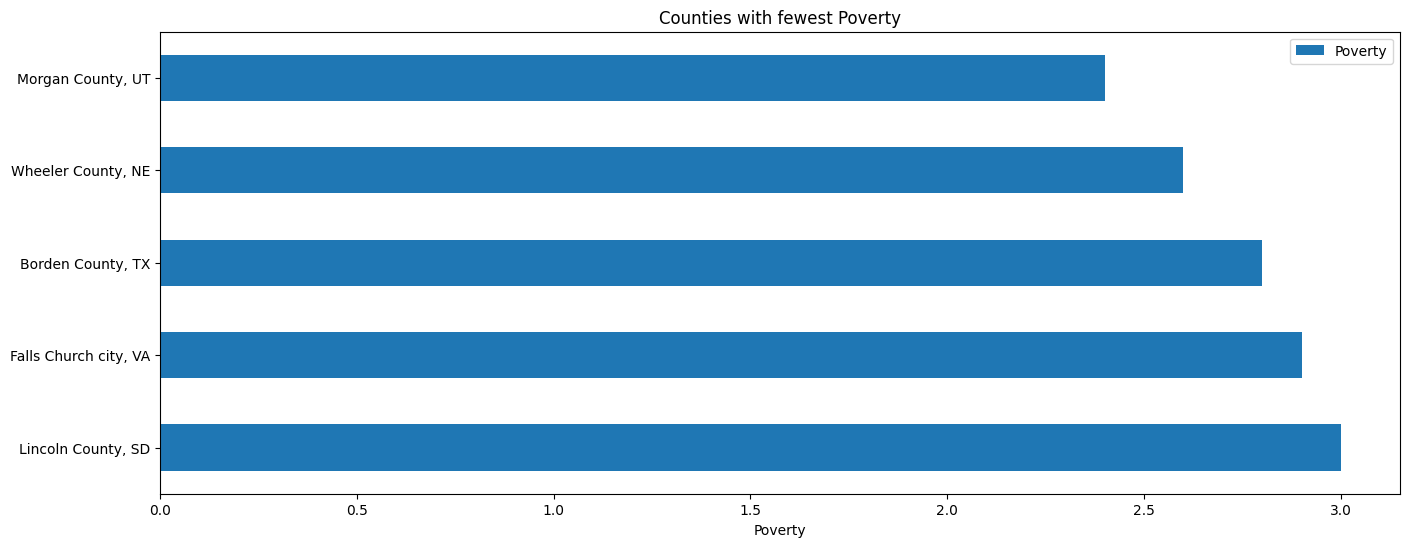

<Figure size 640x480 with 0 Axes>

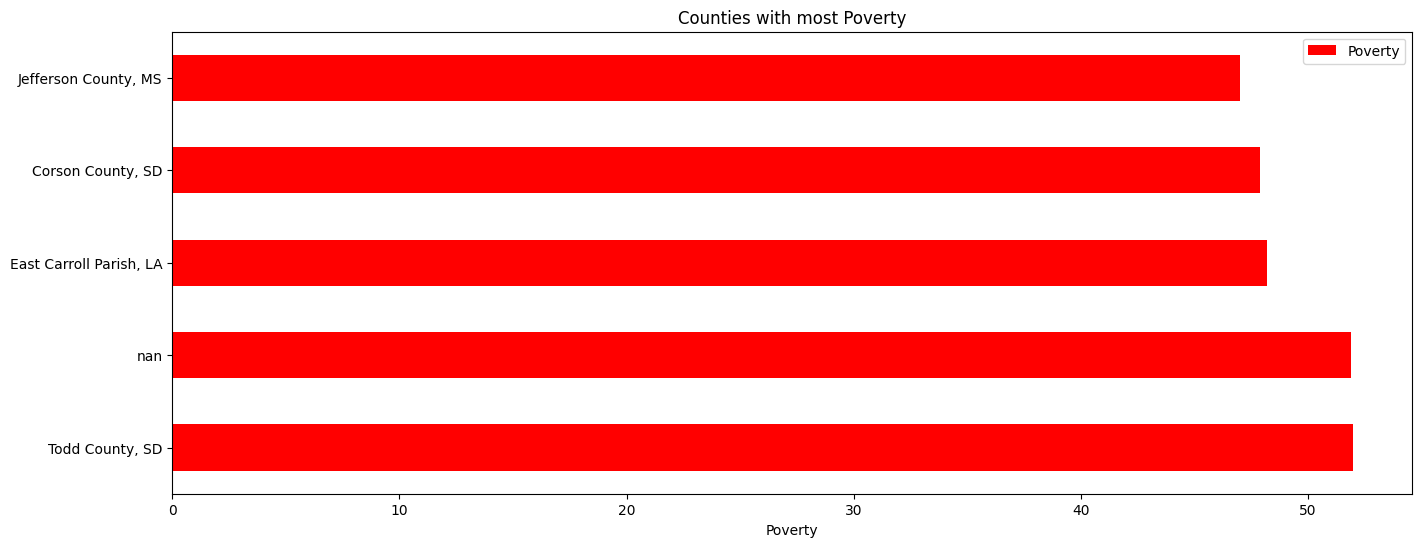

In [18]:
plotTopAndBottom(censusDf, "Poverty")

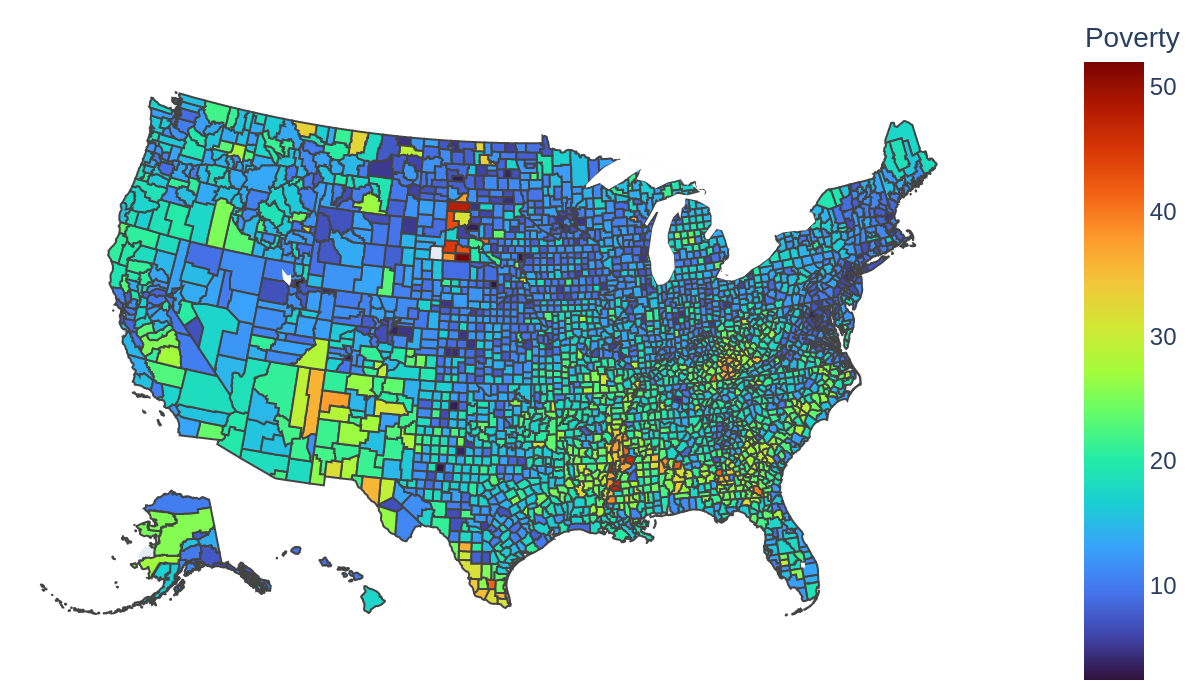

In [19]:
showMap(censusDf, counties, "Poverty", min=minPoverty, max=maxPoverty)

# Etnicity distribution

# Income distribution

In [20]:
minIncome = censusDf["Income"].min()
maxIncome = censusDf["Income"].max()

print(f"min Income {minIncome} and max Income {maxIncome}")

min Income 19264 and max Income 129588


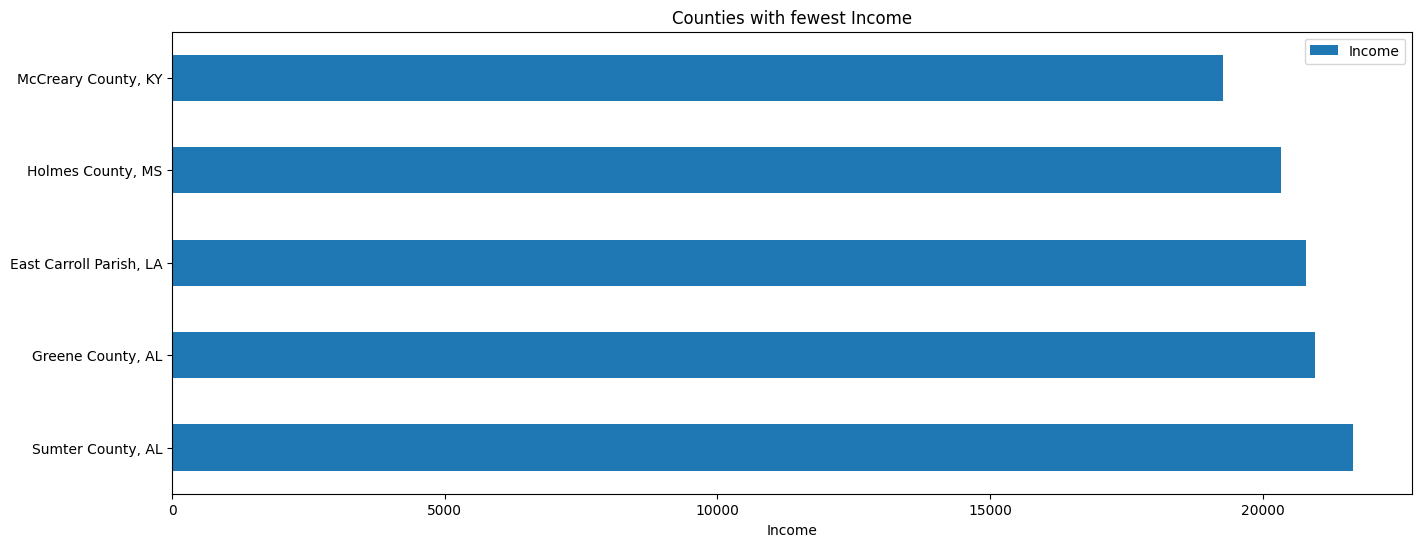

<Figure size 640x480 with 0 Axes>

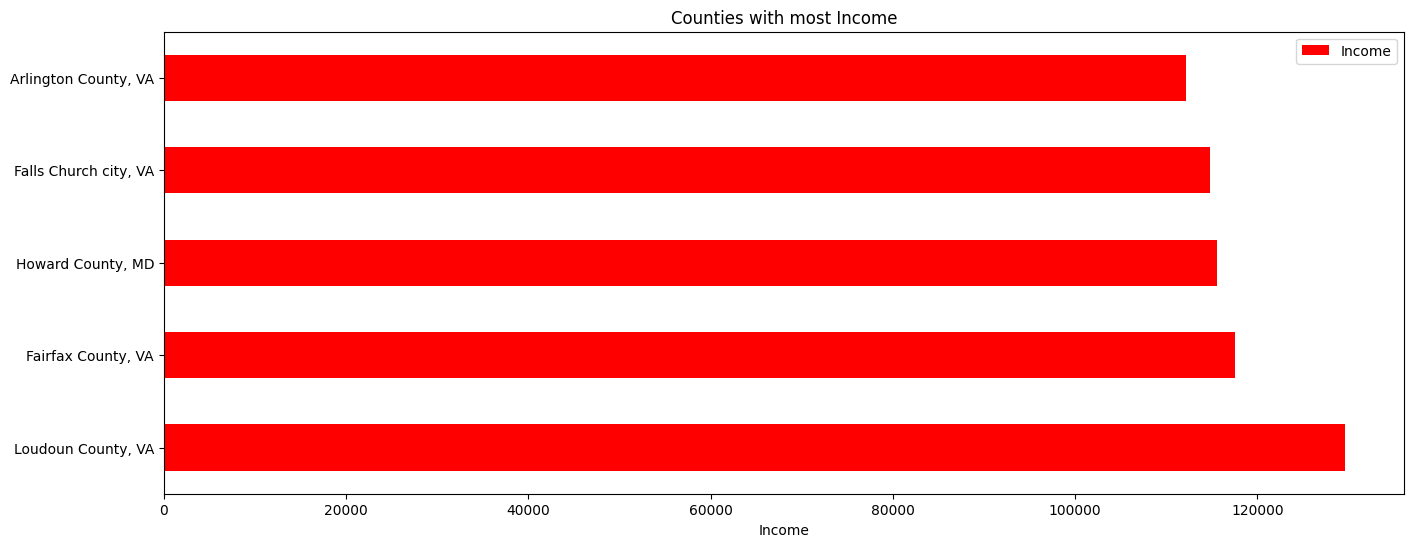

In [21]:
plotTopAndBottom(censusDf, "Income")

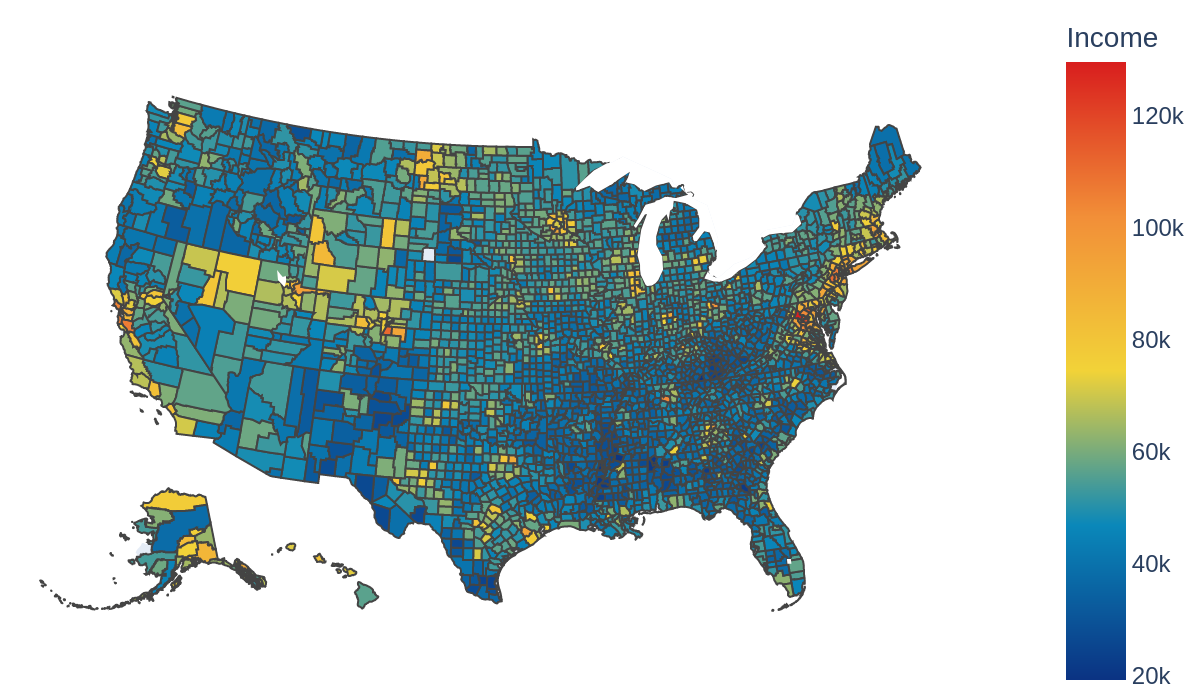

In [22]:
showMap(censusDf, counties, "Income", min=minIncome, max=maxIncome, colorscheme="portland")

# Professional

In [23]:
minProfessional = censusDf["Professional"].min()
maxProfessional = censusDf["Professional"].max()

print(f"min Professional {minProfessional} and max Professional {maxProfessional}")

min Professional 11.4 and max Professional 69.0


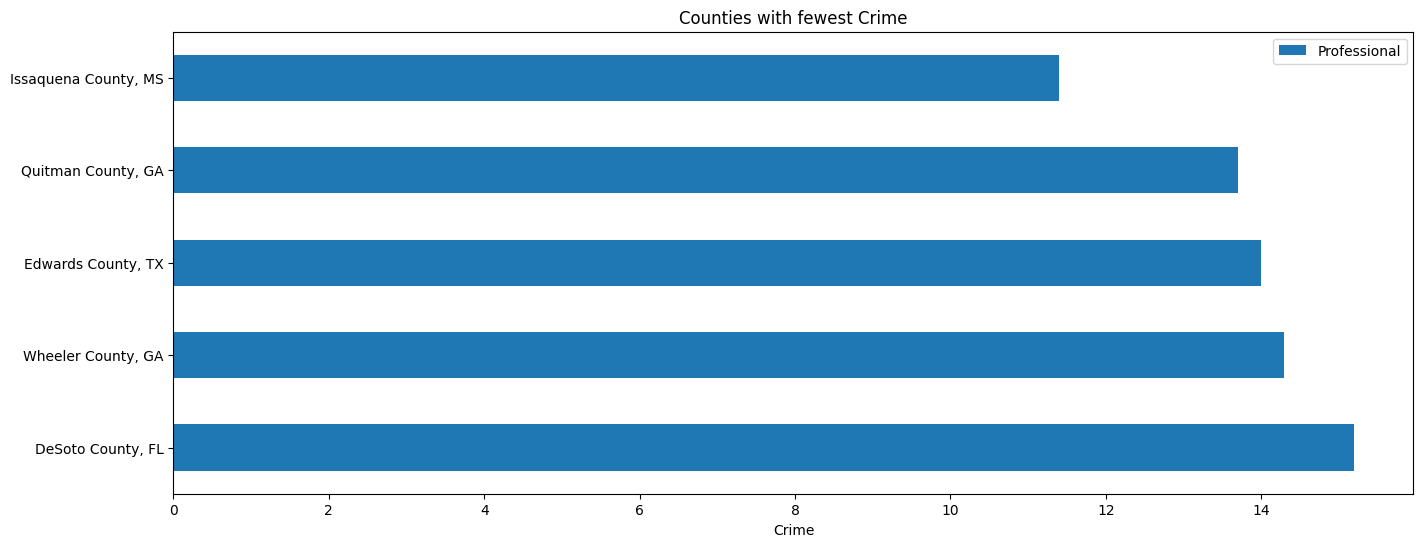

<Figure size 640x480 with 0 Axes>

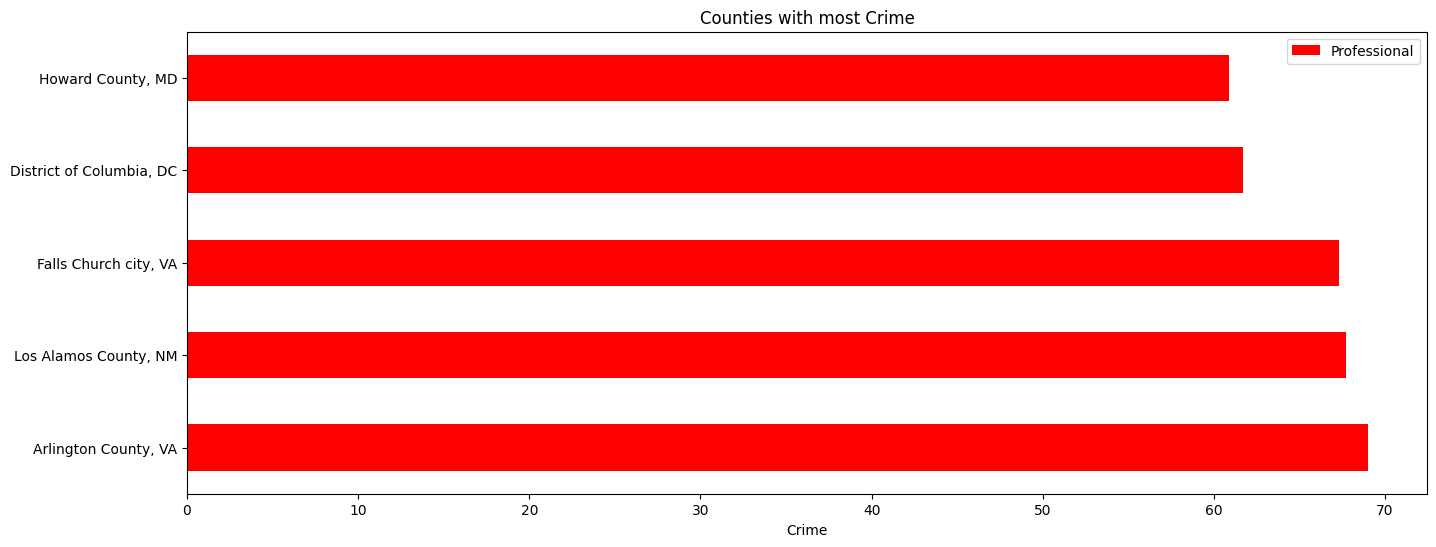

In [24]:
plotTopAndBottom(censusDf, "Professional", "Crime")

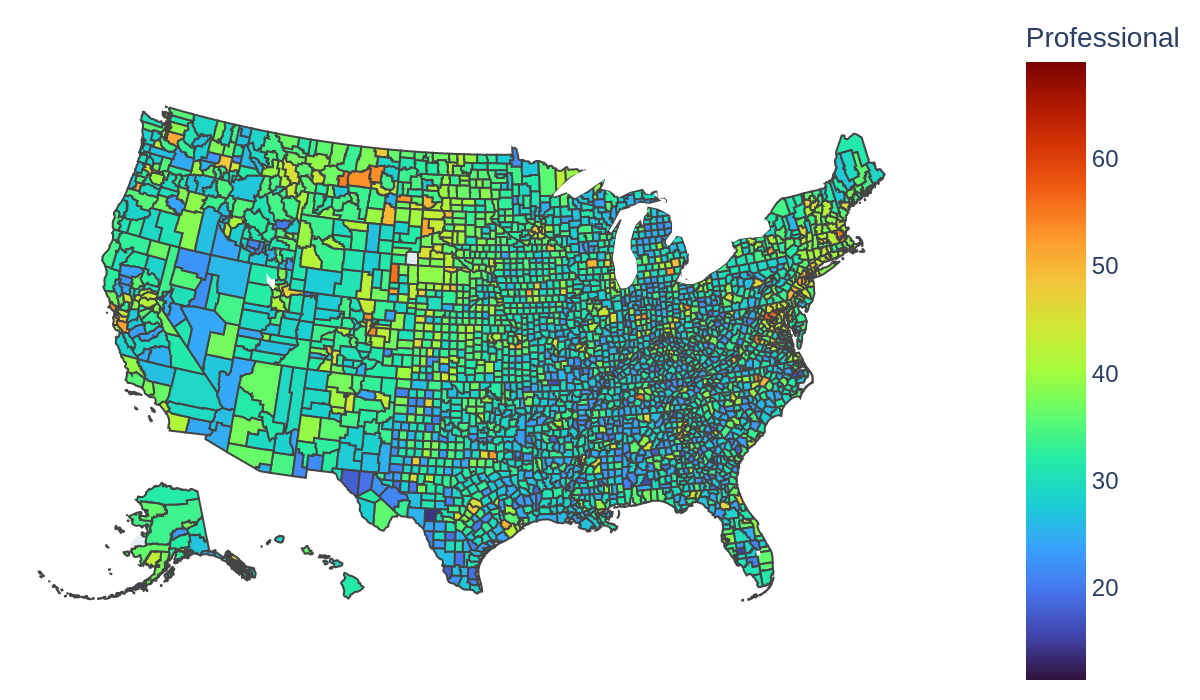

In [25]:
showMap(censusDf, counties, "Professional", min=minProfessional, max=maxProfessional)

# Criminality

In [26]:
minCrime = censusDf["crime_rate_per_100000"].min()
maxCrime = censusDf["crime_rate_per_100000"].max()

print(f"min crime {minCrime} and max crime {maxCrime}")

min crime 0.0 and max crime 1791.995377


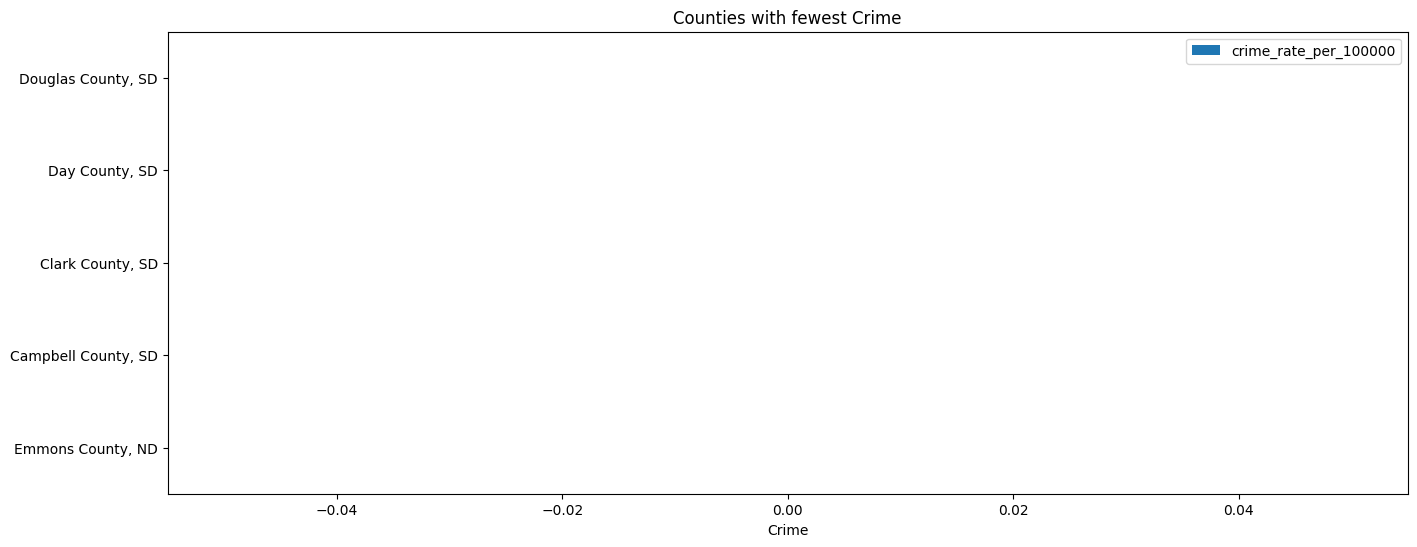

<Figure size 640x480 with 0 Axes>

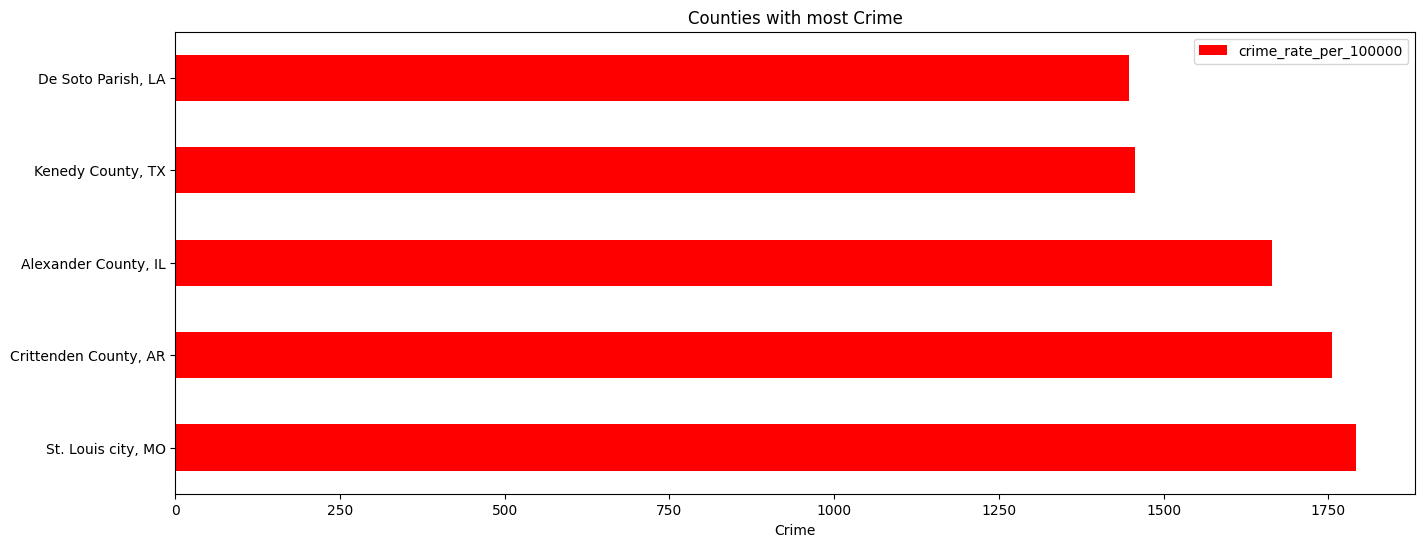

In [27]:
plotTopAndBottom(censusDf, "crime_rate_per_100000", "Crime")

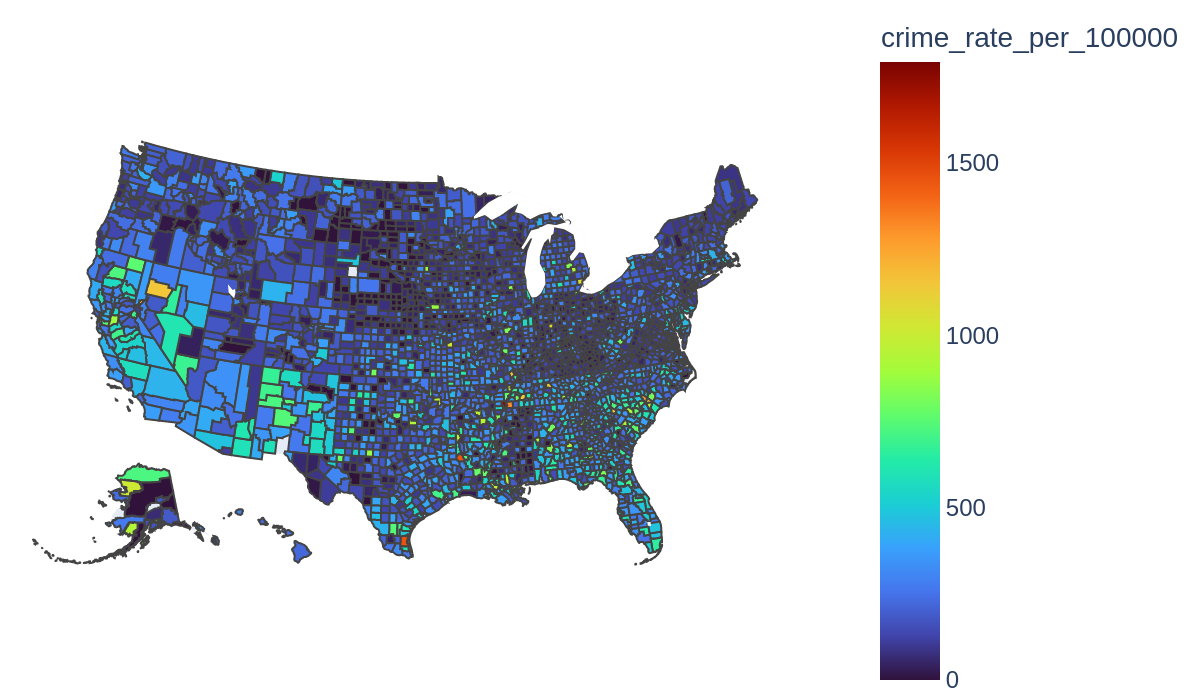

In [28]:
showMap(censusDf, counties, "crime_rate_per_100000", min=minCrime, max=maxCrime)

# Finish
You have made it to the finish! If you liked this please upvote :)